# Basic visualization demonstration

This presents how the visualization module can be run using the `py4dgeo` package to project a point cloud. As a first step, we import the `py4dgeo` packages:

In [ ]:
import py4dgeo
from py4dgeo.util import find_file
import pathlib

## Initialize epoch
Next, we need to load one dataset. Here, we work with a rather small synthetical data set. Once the epoch is loaded, we need to add the coordinate from where the projection is done. The best position is often the coordinates of the scanner the captured the point cloud.

In [ ]:
t1_file = find_file("ahk_2017_652900_5189100_gnd_subarea.laz")

epoch = py4dgeo.read_from_las(t1_file)
epoch.scanpos_info = [652924, 5189200, 2514] # scanner position ([X, Y, Z])
filename = f"{pathlib.Path.home()}/Desktop/p4dgeo_image_projection.tif"

[2025-05-13 10:11:28][INFO] Reading point cloud from file '/home/william/.cache/py4dgeo/./ahk_2017_652900_5189100_gnd_subarea.laz'


## Project point cloud for range image visualization
To project the point cloud, we use the ```project_pc()``` method. Here, we use the default parameters and save the image. 

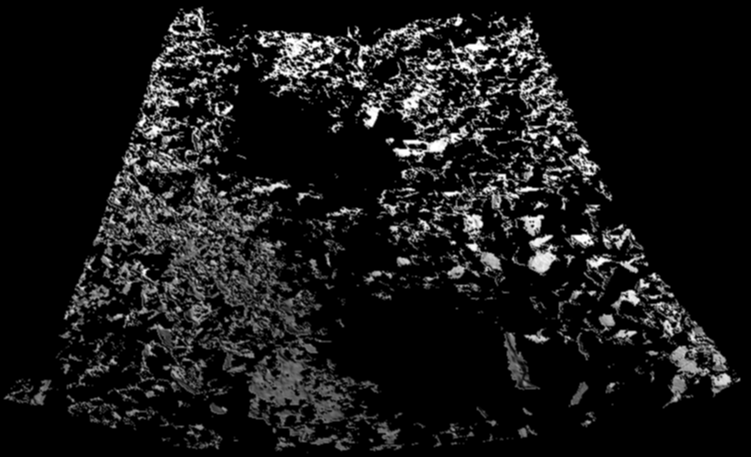

In [5]:
epoch.project_pc()
epoch.visualize(filename=filename, from_notebook=True)

## Visualize events
It is also possible to visualize objects of events as polygons directly on the image as follows.

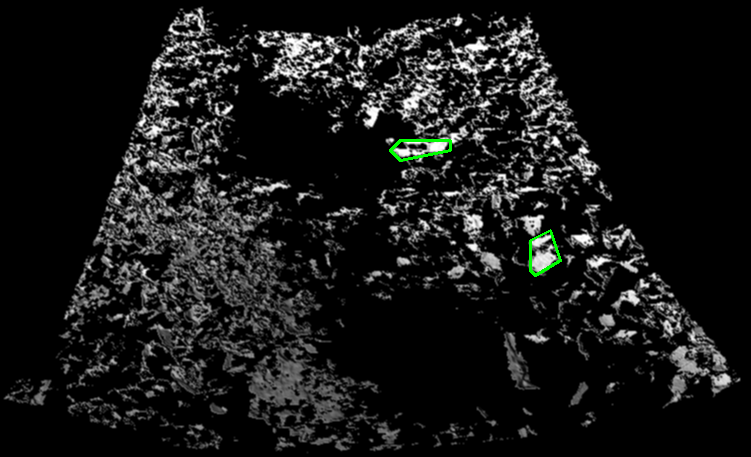

In [6]:
lst_polygon = [
    [(450, 140), (450, 150), (400, 160), (390, 150), (400, 140)],
    [(560, 260), (550, 230), (530, 240), (530, 270), (535, 275)]
]
epoch.visualize(filename=filename, from_notebook=True, lst_polygon=lst_polygon)